In [1]:
import pandas as pd
df = pd.read_csv('sp800-53r5-control-catalog.csv')

print(df.head())

print("\nDataFrame shape:")
print(df.shape)


  Control Identifier              Control (or Control Enhancement) Name  \
0               AC-1                              Policy and Procedures   
1               AC-2                                 Account Management   
2            AC-2(1)  Account Management | Automated System Account ...   
3            AC-2(2)  Account Management | Automated Temporary and E...   
4            AC-2(3)              Account Management | Disable Accounts   

                                        Control Text  \
0  a. Develop, document, and disseminate to [Assi...   
1  a. Define and document the types of accounts a...   
2  Support the management of system accounts usin...   
3  Automatically [Selection: remove; disable] tem...   
4  Disable accounts within [Assignment: organizat...   

                                          Discussion  \
0  Access control policy and procedures address t...   
1  Examples of system account types include indiv...   
2  Automated system account management inclu

In [3]:
# Display the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Get the shape of the DataFrame (number of rows and columns)
print("\nDataFrame shape:")
print(df.shape)

# Get information about the DataFrame, including data types and non-null counts
print("\nDataFrame information:")
print(df.info())

# Summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())

# Unique values in a specific column (e.g., 'Control Identifier')
unique_identifiers = df['Control Identifier'].unique()
print("\nUnique Control Identifiers:")
print(unique_identifiers)

# Count of unique values in a specific column
unique_control_counts = df['Control (or Control Enhancement) Name'].value_counts()
print("\nCounts of unique Control (or Control Enhancement) Names:")
print(unique_control_counts)

First 5 rows of the DataFrame:
  Control Identifier              Control (or Control Enhancement) Name  \
0               AC-1                              Policy and Procedures   
1               AC-2                                 Account Management   
2            AC-2(1)  Account Management | Automated System Account ...   
3            AC-2(2)  Account Management | Automated Temporary and E...   
4            AC-2(3)              Account Management | Disable Accounts   

                                        Control Text  \
0  a. Develop, document, and disseminate to [Assi...   
1  a. Define and document the types of accounts a...   
2  Support the management of system accounts usin...   
3  Automatically [Selection: remove; disable] tem...   
4  Disable accounts within [Assignment: organizat...   

                                          Discussion  \
0  Access control policy and procedures address t...   
1  Examples of system account types include indiv...   
2  Automated 

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import ipywidgets as widgets
from IPython.display import display

# Create an empty graph
G = nx.Graph()

# Process the "Control Identifier" and "Related Controls" columns to add edges to the graph
for index, row in df.iterrows():
    control_identifier = row['Control Identifier']
    related_controls = row['Related Controls']
    
    if not pd.isna(related_controls):
        related_controls = related_controls.split(', ')

        # Add nodes for the control and related controls
        G.add_node(control_identifier)
        for related_control in related_controls:
            G.add_node(related_control)
            G.add_edge(control_identifier, related_control)

# Perform community detection
communities = list(community.greedy_modularity_communities(G))

def plot_communities(comm_index=0):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    colors = plt.cm.viridis([i / len(communities) for i in range(len(communities))])

    
    for i, comm in enumerate(communities):
        if i == comm_index:
            nx.draw_networkx_nodes(G, pos, nodelist=list(comm), node_size=200, node_color=colors[i])
            nx.draw_networkx_labels(G, pos, labels={node: node for node in comm}, font_size=8)
        else:
            nx.draw_networkx_nodes(G, pos, nodelist=list(comm), node_size=50, node_color='lightgray')
    
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
    plt.title(f'Control Communities - Community {comm_index}')
    plt.axis('off')
    plt.show()

community_selector = widgets.IntSlider(value=0, min=0, max=len(communities) - 1, description='Community:')
interactive_plot = widgets.interactive(plot_communities, comm_index=community_selector)

display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Community:', max=71), Output()), _dom_classes=('widget-i…

In [6]:


# Explore the "Related Controls" column
related_controls = df['Related Controls']

# Display the first few entries in the "Related Controls" column
print("First 5 entries in the 'Related Controls' column:")
print(related_controls.head())

# Count unique values and display the most common related controls
related_controls_counts = related_controls.value_counts()
print("\nCounts of unique 'Related Controls':")
print(related_controls_counts)

# Explore the "Control (or Control Enhancement) Name" column
control_names = df['Control (or Control Enhancement) Name']

# Display the first few entries in the "Control (or Control Enhancement) Name" column
print("\nFirst 5 entries in the 'Control (or Control Enhancement) Name' column:")
print(control_names.head())

# Count unique values and display the most common control names
control_names_counts = control_names.value_counts()
print("\nCounts of unique 'Control (or Control Enhancement) Name':")
print(control_names_counts)

NameError: name 'df' is not defined

In [8]:
# Filter rows where "Control (or Control Enhancement) Name" is "None" in the "Related Controls" column
filtered_df = df[df['Related Controls'] == 'None']

# Display the filtered DataFrame
print("Rows where 'Control (or Control Enhancement) Name' is 'None' in 'Related Controls':")
print(filtered_df)

Rows where 'Control (or Control Enhancement) Name' is 'None' in 'Related Controls':
Empty DataFrame
Columns: [Control Identifier, Control (or Control Enhancement) Name, Control Text, Discussion, Related Controls, Unnamed: 5]
Index: []


Most common words in 'Control Text':
[('assignment', 1134), ('system', 846), ('information', 471), ('security', 297), ('b', 287), ('following', 230), ('components', 228), ('access', 190), ('withdrawn', 182), ('privacy', 175)]


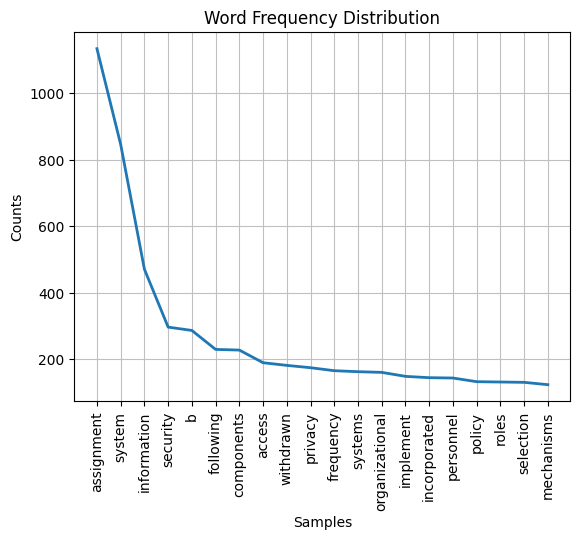

In [9]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


# Combine all "Control Text" entries into a single text corpus
text_corpus = ' '.join(df['Control Text'].astype(str))

# Tokenize the text into words
tokens = word_tokenize(text_corpus)

# Remove punctuation and convert to lowercase
words = [word.lower() for word in tokens if word.isalpha()]

# Remove common English stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Calculate word frequency distribution
fdist = FreqDist(filtered_words)

# Display the most common words in the "Control Text"
print("Most common words in 'Control Text':")
print(fdist.most_common(10))

# Plot a word frequency distribution
fdist.plot(20, title='Word Frequency Distribution')
plt.show()


Most common words in 'Discussion':
[('system', 1312), ('information', 1215), ('organizations', 852), ('security', 842), ('systems', 754), ('may', 634), ('privacy', 586), ('include', 499), ('access', 447), ('organizational', 438)]


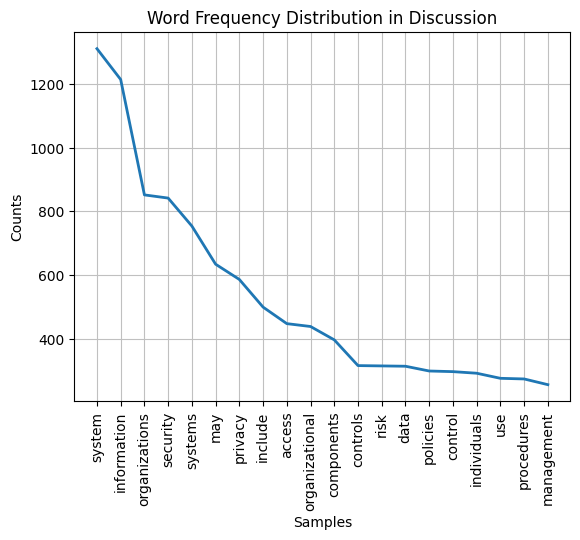

In [10]:

# Combine all "Discussion" entries into a single text corpus
discussion_corpus = ' '.join(df['Discussion'].astype(str))

# Tokenize the text into words
tokens = word_tokenize(discussion_corpus)

# Remove punctuation and convert to lowercase
words = [word.lower() for word in tokens if word.isalpha()]

# Remove common English stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Calculate word frequency distribution
fdist = FreqDist(filtered_words)

# Display the most common words in the "Discussion"
print("Most common words in 'Discussion':")
print(fdist.most_common(10))

# Plot a word frequency distribution
fdist.plot(20, title='Word Frequency Distribution in Discussion')
plt.show()

Most common words in 'Discussion':
[('system', 1312), ('information', 1215), ('organizations', 852), ('security', 842), ('systems', 754), ('may', 634), ('privacy', 586), ('include', 499), ('access', 447), ('organizational', 438)]


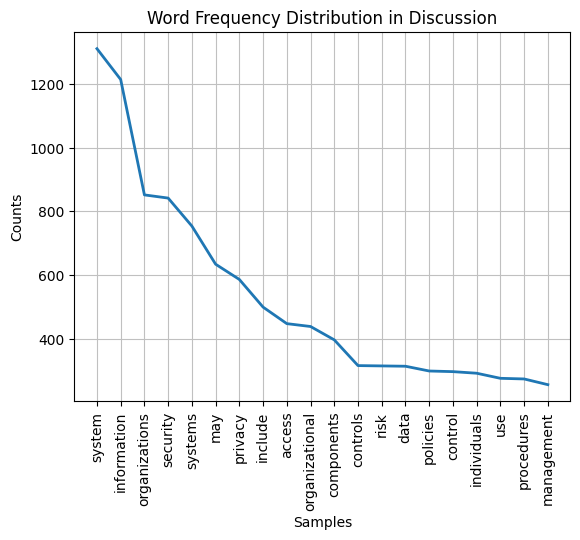

In [11]:
# Combine all "Discussion" entries into a single text corpus
discussion_corpus = ' '.join(df['Discussion'].astype(str))

# Tokenize the text into words
tokens = word_tokenize(discussion_corpus)

# Remove punctuation and convert to lowercase
words = [word.lower() for word in tokens if word.isalpha()]

# Remove common English stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Calculate word frequency distribution
fdist = FreqDist(filtered_words)

# Display the most common words in the "Discussion"
print("Most common words in 'Discussion':")
print(fdist.most_common(10))

# Plot a word frequency distribution
fdist.plot(20, title='Word Frequency Distribution in Discussion')
plt.show()

Most common words in 'Control Text':
[('assignment', 1134), ('system', 846), ('information', 471), ('security', 297), ('b', 287), ('following', 230), ('components', 228), ('access', 190), ('withdrawn', 182), ('privacy', 175)]

Most common words in 'Discussion':
[('system', 1312), ('information', 1215), ('organizations', 852), ('security', 842), ('systems', 754), ('may', 634), ('privacy', 586), ('include', 499), ('access', 447), ('organizational', 438)]


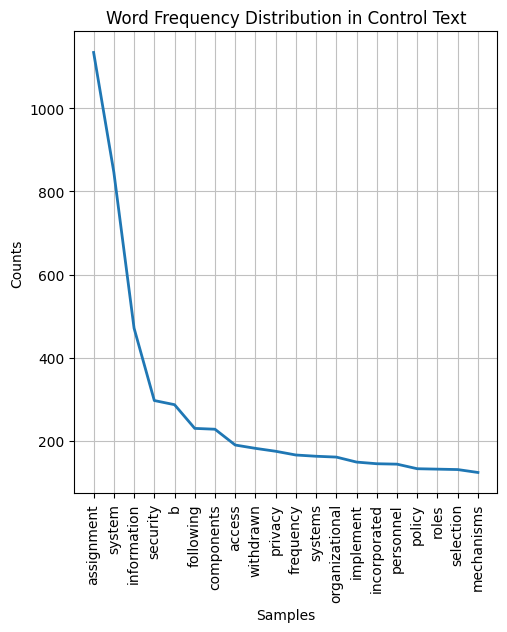

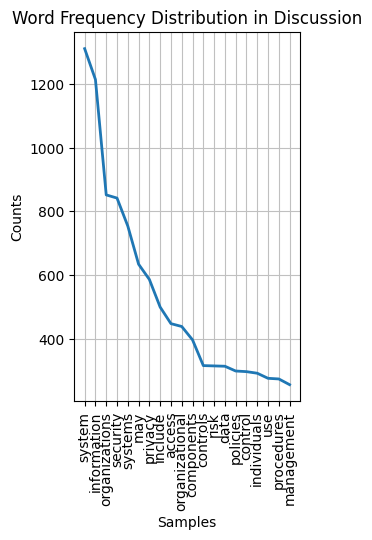

<Figure size 640x480 with 0 Axes>

In [12]:

# Combine all "Control Text" entries into a single text corpus
control_text_corpus = ' '.join(df['Control Text'].astype(str))

# Combine all "Discussion" entries into a single text corpus
discussion_corpus = ' '.join(df['Discussion'].astype(str))

# Tokenize the text in each corpus into words
control_tokens = word_tokenize(control_text_corpus)
discussion_tokens = word_tokenize(discussion_corpus)

# Remove punctuation and convert to lowercase for both corpora
control_words = [word.lower() for word in control_tokens if word.isalpha()]
discussion_words = [word.lower() for word in discussion_tokens if word.isalpha()]

# Remove common English stopwords for both corpora
stop_words = set(stopwords.words('english'))
filtered_control_words = [word for word in control_words if word not in stop_words]
filtered_discussion_words = [word for word in discussion_words if word not in stop_words]

# Calculate word frequency distributions for both corpora
control_fdist = FreqDist(filtered_control_words)
discussion_fdist = FreqDist(filtered_discussion_words)

# Display the most common words in "Control Text" and "Discussion"
print("Most common words in 'Control Text':")
print(control_fdist.most_common(10))

print("\nMost common words in 'Discussion':")
print(discussion_fdist.most_common(10))

# Plot word frequency distributions for both columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
control_fdist.plot(20, title='Word Frequency Distribution in Control Text')
plt.subplot(1, 2, 2)
discussion_fdist.plot(20, title='Word Frequency Distribution in Discussion')
plt.tight_layout()
plt.show()

In [13]:

# Analyze the "Control Identifier" column
control_identifier_counts = df['Control Identifier'].value_counts()

# Display unique values and their counts
print("Unique Control Identifiers and Their Counts:")
print(control_identifier_counts)

# Calculate the number of unique Control Identifiers
unique_control_identifiers = len(control_identifier_counts)
print("\nNumber of Unique Control Identifiers:", unique_control_identifiers)

Unique Control Identifiers and Their Counts:
Control Identifier
AC-1        1
SA-9(1)     1
SA-8(33)    1
SA-8(32)    1
SA-8(31)    1
           ..
IA-2(8)     1
IA-2(4)     1
IA-2(6)     1
IA-2(5)     1
SR-12       1
Name: count, Length: 1189, dtype: int64

Number of Unique Control Identifiers: 1189


In [14]:

# Analyze the "Related Controls" column
related_controls_counts = df['Related Controls'].value_counts()

# Display unique values and their counts
print("Unique Related Controls and Their Counts:")
print(related_controls_counts)

# Calculate the number of unique Related Controls
unique_related_controls = len(related_controls_counts)
print("\nNumber of Unique Related Controls:", unique_related_controls)

Unique Related Controls and Their Counts:
Related Controls
None.                                                                                                       361
SC-12, SC-13.                                                                                                11
PM-9, PS-8, SI-12.                                                                                           10
RA-3.                                                                                                         8
AC-3.                                                                                                         7
                                                                                                           ... 
IA-5.                                                                                                         1
AU-16, IA-2, IA-5.                                                                                            1
AT-2, PT-7.                                  

In [15]:

# Analyze the "Related Controls" and "Control Identifier" columns
related_controls_counts = df['Related Controls'].value_counts()
control_identifier_counts = df['Control Identifier'].value_counts()

# Create sets of unique values for each column
unique_related_controls = set(related_controls_counts.index)
unique_control_identifiers = set(control_identifier_counts.index)

# Find common values between the two columns
common_values = unique_related_controls.intersection(unique_control_identifiers)

# Display common values
print("Common Values between 'Related Controls' and 'Control Identifier':")
for value in common_values:
    print(value)

# Find unique values in each column
unique_related_controls_only = unique_related_controls - unique_control_identifiers
unique_control_identifiers_only = unique_control_identifiers - unique_related_controls

# Display unique values in each column
print("\nUnique Values in 'Related Controls' Only:")
for value in unique_related_controls_only:
    print(value)

print("\nUnique Values in 'Control Identifier' Only:")
for value in unique_control_identifiers_only:
    print(value)

# Calculate the number of common and unique values
num_common_values = len(common_values)
num_related_controls_only = len(unique_related_controls_only)
num_control_identifiers_only = len(unique_control_identifiers_only)

print("\nNumber of Common Values:", num_common_values)
print("Number of Unique Values in 'Related Controls' Only:", num_related_controls_only)
print("Number of Unique Values in 'Control Identifier' Only:", num_control_identifiers_only)

Common Values between 'Related Controls' and 'Control Identifier':

Unique Values in 'Related Controls' Only:
CP-2, CP-8.
CM-3, CM-4.
AC-1, AU-1, AT-1, CA-1, CA-2, CA-5, CA-6, CA-7, CM-1, CP-1, IA-1, IR-1, MA-1, MP-1, PE-1, PL-1, PL-2, PM-2, PM-8, PM-18, PM-28, PM-30, PS-1, PT-1, PT-2, PT-3, RA-1, RA-3, RA-9, SA-1, SA-4, SC-1, SC-38, SI-1, SI-12, SR-1, SR-2.
AC-3, IA-5, SA-4, SC-12, SC-13.
AU-2, AU-6, AU-7, AU-12, CM-6, CM-11, SI-12.
PM-2, PM-19.
AC-8, IA-2, PL-2.
AC-6, SC-12, SC-13.
SI-6.
IA-6.
SC-2, SC-3, SC-29, SC-36.
SI-2.
AC-5.
AU-2, AU-6.
AC-17.
AU-12, IR-4.
PS-2, PS-3, PS-6, PS-7, SA-4, SR-6.
PE-3, SA-4, SI-7, SR-9, SR-10.
AU-3, AU-9, AU-11, AU-12.
CA-7, CM-4, CM-6, SI-7.
AC-2, AC-6, AC-17, AT-4, AU-6, AU-13, CA-2, CA-5, CA-6, CA-7, CM-3, CM-4, CM-6, CM-11, IA-5, IR-5, MA-2, MA-3, MA-4, PE-3, PE-6, PE-14, PE-16, PE-20, PL-2, PM-4, PM-6, PM-9, PM-10, PM-12, PM-14, PM-23, PM-28, PS-7, PT-7, RA-3, RA-5, RA-7, SA-9, SA-11, SC-5, SC-7, SC-18, SC-38, SC-43, SI-3, SI-4, SI-12, SR-2, SR

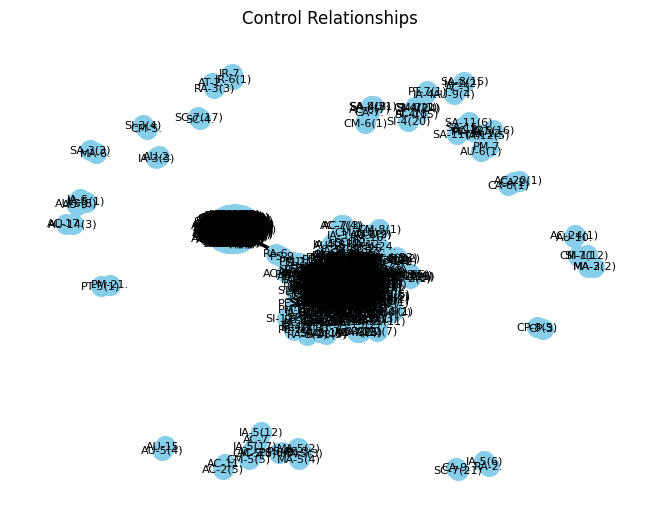

In [18]:
import networkx as nx
# Create an empty graph
G = nx.Graph()

# Process the "Control Identifier" and "Related Controls" columns to add edges to the graph
for index, row in df.iterrows():
    control_identifier = row['Control Identifier']
    related_controls = row['Related Controls']
    
    if not pd.isna(related_controls):
        related_controls = related_controls.split(', ')

        # Add nodes for the control and related controls
        G.add_node(control_identifier)
        for related_control in related_controls:
            G.add_node(related_control)
            G.add_edge(control_identifier, related_control)

# Define the layout for the graph
pos = nx.spring_layout(G, seed=42)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_color='black')
plt.title('Control Relationships')
plt.axis('off')

# Show the graph
plt.show()

/usr/local/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



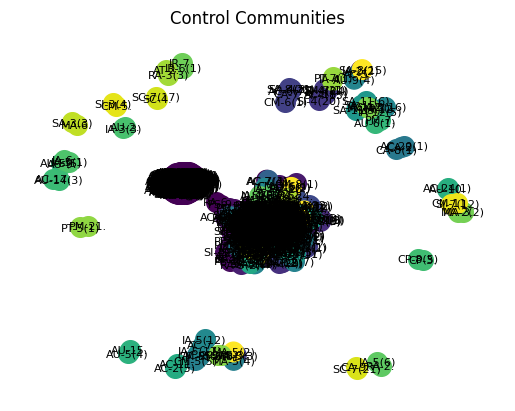

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Create an empty graph
G = nx.Graph()

# Process the "Control Identifier" and "Related Controls" columns to add edges to the graph
for index, row in df.iterrows():
    control_identifier = row['Control Identifier']
    related_controls = row['Related Controls']
    
    if not pd.isna(related_controls):
        related_controls = related_controls.split(', ')

        # Add nodes for the control and related controls
        G.add_node(control_identifier)
        for related_control in related_controls:
            G.add_node(related_control)
            G.add_edge(control_identifier, related_control)

# Perform community detection
communities = list(community.greedy_modularity_communities(G))

# Visualize the communities
pos = nx.spring_layout(G, seed=42)
colors = plt.cm.viridis([i / len(communities) for i in range(len(communities))])
for i, comm in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(comm), node_size=200, node_color=colors[i])
    nx.draw_networkx_labels(G, pos, labels={node: node for node in comm}, font_size=8)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
plt.title('Control Communities')
plt.axis('off')
plt.show()

Degree Centrality:
AC-1: 0.0041876046901172526
IA-1: 0.0041876046901172526
PM-9: 0.03350083752093802
PM-24: 0.006700167504187605
PS-8: 0.018425460636515914
SI-12 .: 0.0008375209380234506
AC-2: 0.03936348408710218
AC-3: 0.0678391959798995
AC-5: 0.019262981574539362
AC-6: 0.03098827470686767
AC-17: 0.02763819095477387
AC-18: 0.020100502512562814
AC-20: 0.010887772194304857
AC-24: 0.002512562814070352
AU-2: 0.04438860971524288
AU-12: 0.024288107202680067
CM-5: 0.020100502512562814
IA-2: 0.02847571189279732
IA-4: 0.020100502512562814
IA-5: 0.021775544388609715
IA-8: 0.018425460636515914
MA-3: 0.010887772194304857
MA-5: 0.01340033500837521
PE-2: 0.01675041876046901
PL-4: 0.018425460636515914
PS-2: 0.01172529313232831
PS-4: 0.006700167504187605
PS-5: 0.005862646566164155
PS-7: 0.01507537688442211
PT-2: 0.020938023450586266
PT-3: 0.015912897822445562
SC-7: 0.04103852596314908
SC-12: 0.05108877721943049
SC-13: 0.03015075376884422
SC-37.: 0.002512562814070352
AC-2(1): 0.0008375209380234506
None

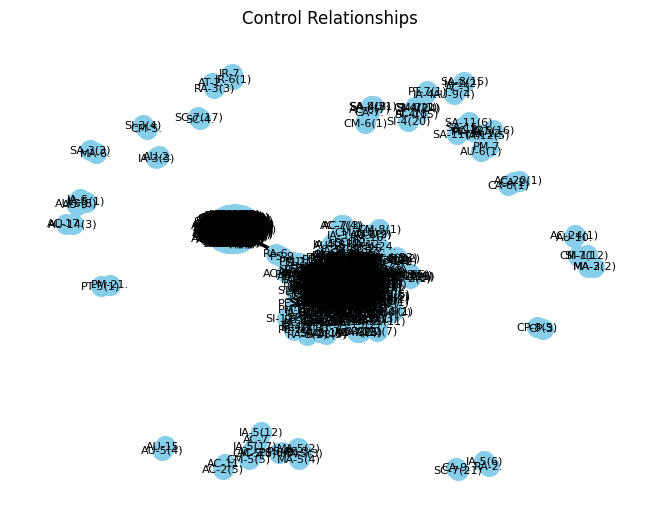

In [21]:

# Create an empty graph
G = nx.Graph()

# Process the "Control Identifier" and "Related Controls" columns to add edges to the graph
for index, row in df.iterrows():
    control_identifier = row['Control Identifier']
    related_controls = row['Related Controls']
    
    if not pd.isna(related_controls):
        related_controls = related_controls.split(', ')

        # Add nodes for the control and related controls
        G.add_node(control_identifier)
        for related_control in related_controls:
            G.add_node(related_control)
            G.add_edge(control_identifier, related_control)

# Calculate network metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
clustering_coefficient = nx.average_clustering(G)

# Visualize the network metrics
print("Degree Centrality:")
for node, degree in degree_centrality.items():
    print(f"{node}: {degree}")

print("\nCloseness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"{node}: {closeness}")

print("\nBetweenness Centrality:")
for node, betweenness in betweenness_centrality.items():
    print(f"{node}: {betweenness}")

print("\nEigenvector Centrality:")
for node, eigenvector in eigenvector_centrality.items():
    print(f"{node}: {eigenvector}")

print(f"\nAverage Clustering Coefficient: {clustering_coefficient}")

# Visualize the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_color='black')
plt.title('Control Relationships')
plt.axis('off')
plt.show()

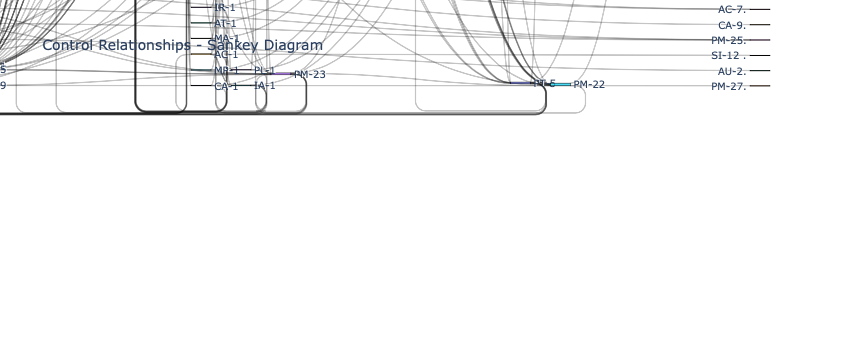

In [26]:
import plotly.graph_objects as go

# Create a list of unique control identifiers
unique_controls = list(set(df['Control Identifier']))

# Create a list of unique related controls by filtering out NaN values
unique_related_controls = list(set(df['Related Controls'].str.split(', ').explode().dropna()))

# Combine unique controls and related controls
all_nodes = unique_controls + unique_related_controls

# Create a dictionary to assign numeric IDs to nodes
node_ids = {node: i for i, node in enumerate(all_nodes)}

# Create source and target indices for edges, handling NaN values
source_indices = []
target_indices = []

for _, row in df.iterrows():
    control_identifier = row['Control Identifier']
    related_controls = row['Related Controls']

    if not pd.isna(related_controls):
        related_controls = related_controls.split(', ')
        for related in related_controls:
            source_indices.append(node_ids[control_identifier])
            target_indices.append(node_ids[related])

# Create a Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=[1] * len(source_indices)  # You can customize the values as needed
    )
))

# Customize the Sankey diagram layout
fig.update_layout(title_text="Control Relationships - Sankey Diagram", font_size=10)

# Show the Sankey diagram
fig.show()


In [27]:
# Filter the DataFrame to find rows where 'Assignment: organization-defined' exists in 'Control Text'
filtered_df = df[df['Control Text'].str.contains('Assignment: organization-defined')]

# Display the filtered results
print(filtered_df)


     Control Identifier              Control (or Control Enhancement) Name  \
0                  AC-1                              Policy and Procedures   
1                  AC-2                                 Account Management   
2               AC-2(1)  Account Management | Automated System Account ...   
3               AC-2(2)  Account Management | Automated Temporary and E...   
4               AC-2(3)              Account Management | Disable Accounts   
...                 ...                                                ...   
1184              SR-11                             Component Authenticity   
1185           SR-11(1)  Component Authenticity | Anti-counterfeit Trai...   
1186           SR-11(2)  Component Authenticity | Configuration Control...   
1187           SR-11(3)  Component Authenticity | Anti-counterfeit Scan...   
1188              SR-12                                 Component Disposal   

                                           Control Text  \
0   

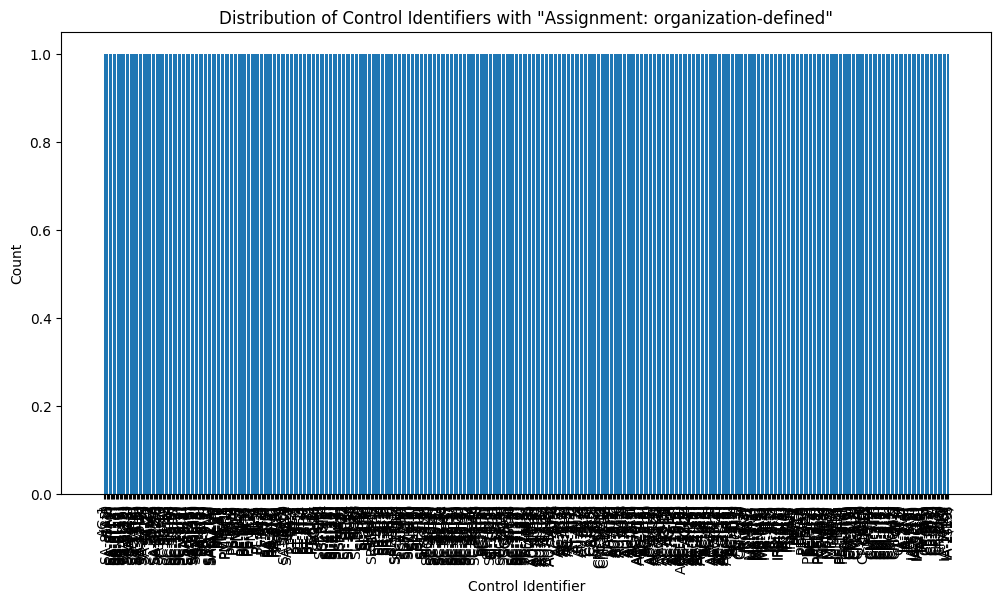

In [29]:
import matplotlib.pyplot as plt

# Group the filtered data by a specific column (e.g., 'Control Identifier') and count the occurrences
grouped_data = filtered_df.groupby('Control Identifier').size().reset_index(name='Count')

# Sort the data by count in descending order
sorted_data = grouped_data.sort_values(by='Count', ascending=False)

# Create a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
plt.bar(sorted_data['Control Identifier'], sorted_data['Count'])
plt.xlabel('Control Identifier')
plt.ylabel('Count')
plt.title('Distribution of Control Identifiers with "Assignment: organization-defined"')
plt.xticks(rotation=90)
plt.show()


In [30]:
# Filter the DataFrame to find rows where 'Assignment: organization-defined' exists in 'Control Text'
filtered_df = df[df['Control Text'].str.contains('Assignment: organization-defined')]

# Display the filtered data in an HTML table format
html_table = filtered_df.to_html(classes='table table-striped', index=False)

# Print or render the HTML table
from IPython.display import HTML
HTML(html_table)


Control Identifier,Control (or Control Enhancement) Name,Control Text,Discussion,Related Controls,Unnamed: 5
AC-1,Policy and Procedures,"a. Develop, document, and disseminate to [Assignment: organization-defined personnel or roles]:\n1. [Selection (one or more): Organization-level; Mission/business process-level; System-level] access control policy that:\n(a) Addresses purpose, scope, roles, responsibilities, management commitment, coordination among organizational entities, and compliance; and\n(b) Is consistent with applicable laws, executive orders, directives, regulations, policies, standards, and guidelines; and\n2. Procedures to facilitate the implementation of the access control policy and the associated access controls;\nb. Designate an [Assignment: organization-defined official] to manage the development, documentation, and dissemination of the access control policy and procedures; and\nc. Review and update the current access control:\n1. Policy [Assignment: organization-defined frequency] and following [Assignment: organization-defined events]; and\n2. Procedures [Assignment: organization-defined frequency] and following [Assignment: organization-defined events].","Access control policy and procedures address the controls in the AC family that are implemented within systems and organizations. The risk management strategy is an important factor in establishing such policies and procedures. Policies and procedures contribute to security and privacy assurance. Therefore, it is important that security and privacy programs collaborate on the development of access control policy and procedures. Security and privacy program policies and procedures at the organization level are preferable, in general, and may obviate the need for mission- or system-specific policies and procedures. The policy can be included as part of the general security and privacy policy or be represented by multiple policies reflecting the complex nature of organizations. Procedures can be established for security and privacy programs, for mission or business processes, and for systems, if needed. Procedures describe how the policies or controls are implemented and can be directed at the individual or role that is the object of the procedure. Procedures can be documented in system security and privacy plans or in one or more separate documents. Events that may precipitate an update to access control policy and procedures include assessment or audit findings, security incidents or breaches, or changes in laws, executive orders, directives, regulations, policies, standards, and guidelines. Simply restating controls does not constitute an organizational policy or procedure.","IA-1, PM-9, PM-24, PS-8, SI-12 .",NaN
AC-2,Account Management,"a. Define and document the types of accounts allowed and specifically prohibited for use within the system;\nb. Assign account managers;\nc. Require [Assignment: organization-defined prerequisites and criteria] for group and role membership;\nd. Specify:\n1. Authorized users of the system;\n2. Group and role membership; and\n3. Access authorizations (i.e., privileges) and [Assignment: organization-defined attributes (as required)] for each account;\ne. Require approvals by [Assignment: organization-defined personnel or roles] for requests to create accounts;\nf. Create, enable, modify, disable, and remove accounts in accordance with [Assignment: organization-defined policy, procedures, prerequisites, and criteria];\ng. Monitor the use of accounts;\nh. Notify account managers and [Assignment: organization-defined personnel or roles] within:\n1. [Assignment: organization-defined time period] when accounts are no longer required;\n2. [Assignment: organization-defined time period] when users are terminated or transferred; and\n3. [Assignment: organization-defined time period] when system usage or need-to-know changes for an individual;\ni. Authorize access to the system based on:\n1. A valid access authorization;\n2. Intended 

In [35]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output



# Create a dropdown widget to select a control
control_dropdown = widgets.Dropdown(
    options=['All'] + df['Control Identifier'].unique(),
    description='Select a Control:'
)

# Create an output widget for displaying the control text
control_text_output = widgets.Output()

# Define a function to update the displayed control text
def update_control_text(change):
    control_selected = control_dropdown.value
    with control_text_output:
        clear_output()
        if control_selected == 'All':
            display(df)
        else:
            selected_text = df[df['Control Identifier'] == control_selected]['Control Text'].values[0]
            print(selected_text)

# Attach the function to the dropdown's value change event
control_dropdown.observe(update_control_text, names='value')

# Display the widgets
display(control_dropdown)
display(control_text_output)


Dropdown(description='Select a Control:', options=('AllAC-1', 'AllAC-2', 'AllAC-2(1)', 'AllAC-2(2)', 'AllAC-2(…

Output()

In [33]:
print(df.head())

  Control Identifier              Control (or Control Enhancement) Name  \
0               AC-1                              Policy and Procedures   
1               AC-2                                 Account Management   
2            AC-2(1)  Account Management | Automated System Account ...   
3            AC-2(2)  Account Management | Automated Temporary and E...   
4            AC-2(3)              Account Management | Disable Accounts   

                                        Control Text  \
0  a. Develop, document, and disseminate to [Assi...   
1  a. Define and document the types of accounts a...   
2  Support the management of system accounts usin...   
3  Automatically [Selection: remove; disable] tem...   
4  Disable accounts within [Assignment: organizat...   

                                          Discussion  \
0  Access control policy and procedures address t...   
1  Examples of system account types include indiv...   
2  Automated system account management inclu

In [37]:
# Create a dropdown widget to select a control
# Create a dropdown widget to select a control
control_name_dropdown = widgets.Dropdown(
    options=df['Control (or Control Enhancement) Name'].unique(),
    description='Select a Control Name:'
)

# Create an output widget for displaying the related information
related_info_output = widgets.Output()

# Define a function to update the displayed related information
def update_related_info(change):
    control_name_selected = control_name_dropdown.value
    with related_info_output:
        clear_output()
        selected_rows = df[df['Control (or Control Enhancement) Name'] == control_name_selected]
        if not selected_rows.empty:
            display(selected_rows)
        else:
            print(f"No information found for Control Name: {control_name_selected}")

# Attach the function to the dropdown's value change event
control_name_dropdown.observe(update_related_info, names='value')

# Display the widgets
display(control_name_dropdown)
display(related_info_output)

Dropdown(description='Select a Control Name:', options=('Policy and Procedures', 'Account Management', 'Accoun…

Output()

In [38]:
def explore_related_controls(dataframe):
    # Create a dropdown widget to select a control
    control_name_dropdown = widgets.Dropdown(
        options=dataframe['Control (or Control Enhancement) Name'].unique(),
        description='Select a Control Name:'
    )

    # Create an output widget for displaying the related information
    related_info_output = widgets.Output()

    # Define a function to update the displayed related information
    def update_related_info(change):
        control_name_selected = control_name_dropdown.value
        with related_info_output:
            clear_output()
            selected_rows = dataframe[dataframe['Control (or Control Enhancement) Name'] == control_name_selected]
            if not selected_rows.empty:
                display(selected_rows)
            else:
                print(f"No information found for Control Name: {control_name_selected}")

    # Attach the function to the dropdown's value change event
    control_name_dropdown.observe(update_related_info, names='value')

    # Display the widgets
    display(control_name_dropdown)
    display(related_info_output)

# Call the function to set up the widget and display the related controls
explore_related_controls(df)

Dropdown(description='Select a Control Name:', options=('Policy and Procedures', 'Account Management', 'Accoun…

Output()